<a href="https://colab.research.google.com/github/anton-akulenko/HW02-DS/blob/main/HW_11_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Bidirectional

%matplotlib inline


In [2]:
max_features = 15000  # кількість слів, що розглядаються як особливості
maxlen = 700  # обмеження кількості слів в тексті
batch_size = 32
optimizer = "Adam" #"rmsprop"
epochs = 7

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)


In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# SRNN

In [5]:
model_simple = Sequential()
# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_simple.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model_simple.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_simple.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [6]:
model_simple.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [7]:
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 482113 (1.84 MB)
Trainable params: 482113 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history_simple = model_simple.fit(input_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)


Epoch 1/7
137/137 [==============================] - 38s 255ms/step - loss: 0.6569 - acc: 0.5990 - val_loss: 0.4825 - val_acc: 0.7736
Epoch 2/7
137/137 [==============================] - 39s 283ms/step - loss: 0.4165 - acc: 0.8227 - val_loss: 0.4155 - val_acc: 0.8211
Epoch 3/7
137/137 [==============================] - 36s 262ms/step - loss: 0.2367 - acc: 0.9098 - val_loss: 0.3895 - val_acc: 0.8295
Epoch 4/7
137/137 [==============================] - 39s 285ms/step - loss: 0.1088 - acc: 0.9656 - val_loss: 0.3848 - val_acc: 0.8609
Epoch 5/7
137/137 [==============================] - 39s 283ms/step - loss: 0.0431 - acc: 0.9894 - val_loss: 0.4442 - val_acc: 0.8333
Epoch 6/7
137/137 [==============================] - 39s 284ms/step - loss: 0.0178 - acc: 0.9967 - val_loss: 0.4821 - val_acc: 0.8451
Epoch 7/7
137/137 [==============================] - 39s 284ms/step - loss: 0.0105 - acc: 0.9984 - val_loss: 0.5528 - val_acc: 0.8613


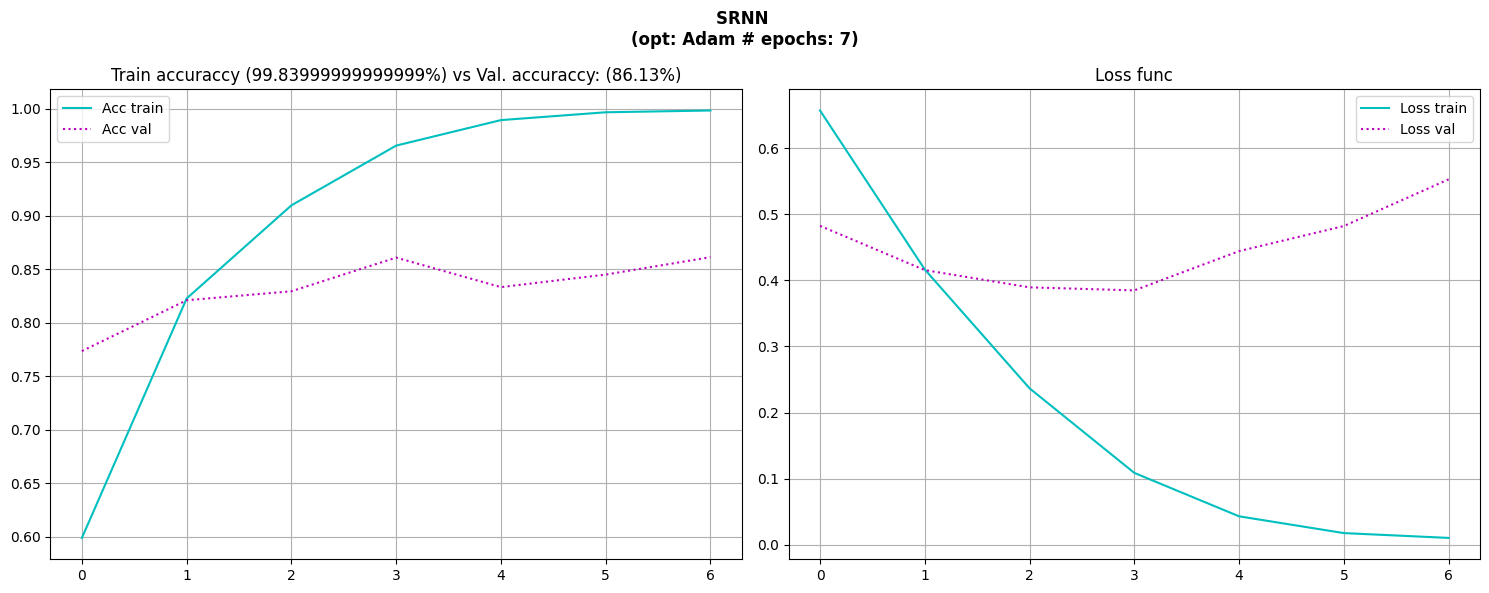

In [9]:
# @title
acc = history_simple.history['acc']
val_acc = history_simple.history['val_acc']
loss = history_simple.history['loss']
val_loss = history_simple.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'SRNN \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

In [10]:
predictions_simple = model_simple.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_simple = [1 if pred > 0.5 else 0 for pred in predictions_simple]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Pred: {binary_predictions_simple[i]}, Fact: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_simple.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 32s 41ms/step
Pred: 0, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 0
Pred: 1, Fact: 1
782/782 [==============================] - 32s 41ms/step - loss: 0.5909 - acc: 0.8459
Test Loss: 0.5909166932106018
Test Accuracy: 0.8459200263023376


# GRU

In [11]:
model_GRU = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_GRU.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання GRU шару з 32 вузлами
model_GRU.add(GRU(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_GRU.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [12]:
model_GRU.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [13]:
model_GRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          480000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 486369 (1.86 MB)
Trainable params: 486369 (1.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
history_GRU = model_GRU.fit(input_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)


Epoch 1/7
137/137 [==============================] - 82s 577ms/step - loss: 0.5668 - acc: 0.6928 - val_loss: 0.3727 - val_acc: 0.8411
Epoch 2/7
137/137 [==============================] - 79s 575ms/step - loss: 0.2747 - acc: 0.8915 - val_loss: 0.3069 - val_acc: 0.8709
Epoch 3/7
137/137 [==============================] - 78s 569ms/step - loss: 0.1751 - acc: 0.9355 - val_loss: 0.3176 - val_acc: 0.8735
Epoch 4/7
137/137 [==============================] - 84s 604ms/step - loss: 0.1254 - acc: 0.9592 - val_loss: 0.3532 - val_acc: 0.8771
Epoch 5/7
137/137 [==============================] - 79s 576ms/step - loss: 0.0954 - acc: 0.9695 - val_loss: 0.4256 - val_acc: 0.8697
Epoch 6/7
137/137 [==============================] - 79s 576ms/step - loss: 0.0699 - acc: 0.9790 - val_loss: 0.4662 - val_acc: 0.8727
Epoch 7/7
137/137 [==============================] - 79s 574ms/step - loss: 0.0551 - acc: 0.9846 - val_loss: 0.4789 - val_acc: 0.8656


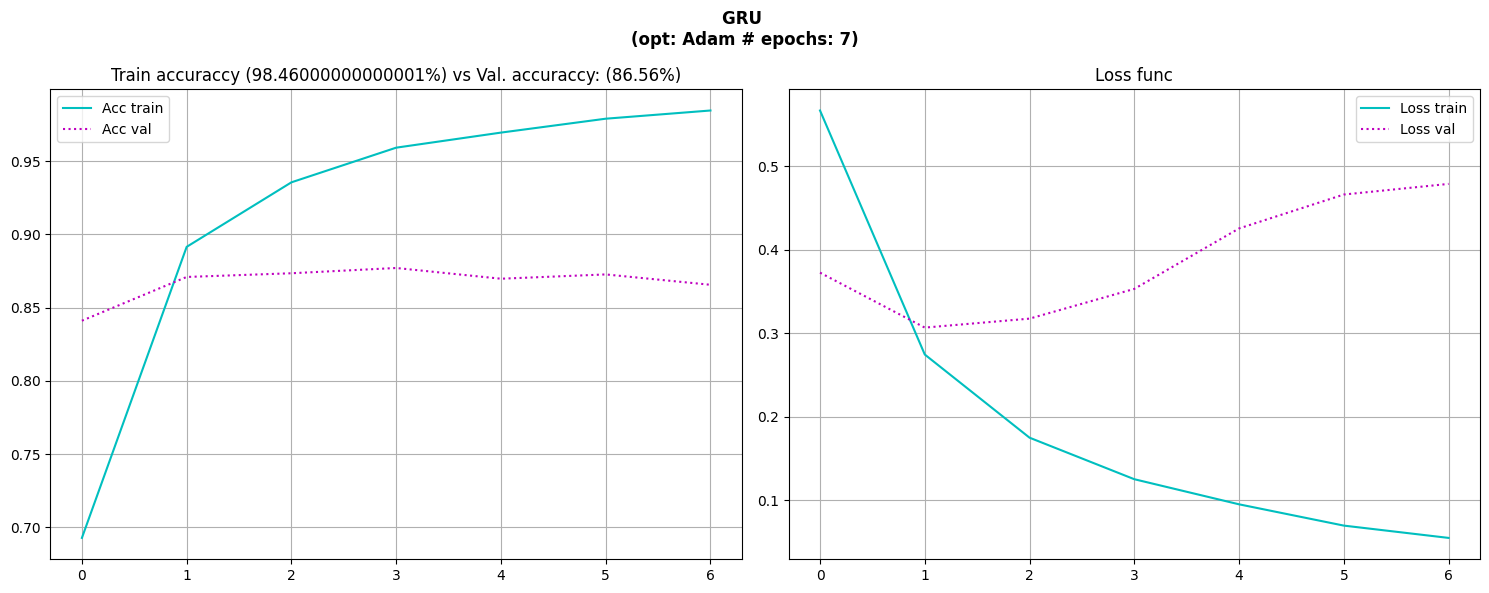

In [15]:
acc = history_GRU.history['acc']
val_acc = history_GRU.history['val_acc']
loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'GRU \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

In [16]:
predictions_GRU = model_GRU.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_GRU = [1 if pred > 0.5 else 0 for pred in predictions_GRU]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Pred: {binary_predictions_GRU[i]}, Fact: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_GRU.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 49s 63ms/step
Pred: 1, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 0
Pred: 1, Fact: 1
782/782 [==============================] - 51s 65ms/step - loss: 0.5235 - acc: 0.8528
Test Loss: 0.5234976410865784
Test Accuracy: 0.8527600169181824


# LSTM

In [17]:
model_LSTM = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_LSTM.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання GRU шару з 32 вузлами
model_LSTM.add(LSTM(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_LSTM.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [18]:
model_LSTM.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [19]:
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          480000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 488353 (1.86 MB)
Trainable params: 488353 (1.86 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
history_LSTM = model_LSTM.fit(input_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)


Epoch 1/7
137/137 [==============================] - 80s 567ms/step - loss: 0.5400 - acc: 0.7247 - val_loss: 0.3388 - val_acc: 0.8599
Epoch 2/7
137/137 [==============================] - 78s 568ms/step - loss: 0.2577 - acc: 0.9003 - val_loss: 0.2832 - val_acc: 0.8877
Epoch 3/7
137/137 [==============================] - 81s 595ms/step - loss: 0.1597 - acc: 0.9454 - val_loss: 0.2893 - val_acc: 0.8860
Epoch 4/7
137/137 [==============================] - 79s 581ms/step - loss: 0.1108 - acc: 0.9660 - val_loss: 0.3737 - val_acc: 0.8731
Epoch 5/7
137/137 [==============================] - 80s 587ms/step - loss: 0.0750 - acc: 0.9794 - val_loss: 0.3843 - val_acc: 0.8808
Epoch 6/7
137/137 [==============================] - 83s 606ms/step - loss: 0.0630 - acc: 0.9813 - val_loss: 0.4192 - val_acc: 0.8621
Epoch 7/7
137/137 [==============================] - 82s 600ms/step - loss: 0.0500 - acc: 0.9861 - val_loss: 0.4581 - val_acc: 0.8711


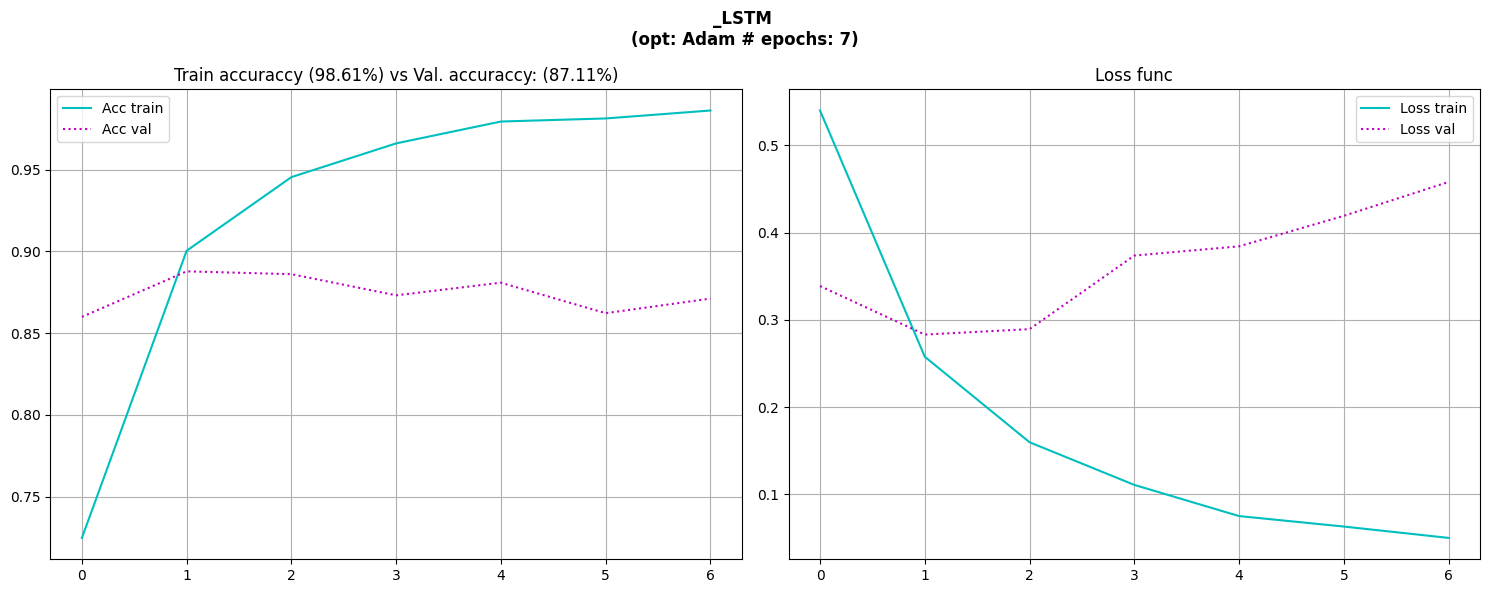

In [21]:
acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'_LSTM \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

In [22]:
predictions_LSTM = model_LSTM.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_LSTM = [1 if pred > 0.5 else 0 for pred in predictions_LSTM]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Pred: {binary_predictions_LSTM[i]}, Fact: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_LSTM.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 54s 69ms/step
Pred: 1, Fact: 0
Pred: 1, Fact: 1
Pred: 0, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 0
Pred: 1, Fact: 1
782/782 [==============================] - 55s 70ms/step - loss: 0.5229 - acc: 0.8527
Test Loss: 0.5229248404502869
Test Accuracy: 0.8526800274848938


# BRNN

In [23]:
model_BRNN = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_BRNN.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання GRU шару з 32 вузлами
model_BRNN.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_BRNN.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [24]:
model_BRNN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [25]:
model_BRNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          480000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 496705 (1.89 MB)
Trainable params: 496705 (1.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
history_BRNN = model_BRNN.fit(input_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)


Epoch 1/7
137/137 [==============================] - 155s 1s/step - loss: 0.5543 - acc: 0.7098 - val_loss: 0.3745 - val_acc: 0.8424
Epoch 2/7
137/137 [==============================] - 152s 1s/step - loss: 0.2797 - acc: 0.8921 - val_loss: 0.3053 - val_acc: 0.8825
Epoch 3/7
137/137 [==============================] - 150s 1s/step - loss: 0.1787 - acc: 0.9391 - val_loss: 0.3134 - val_acc: 0.8725
Epoch 4/7
137/137 [==============================] - 148s 1s/step - loss: 0.1216 - acc: 0.9612 - val_loss: 0.3405 - val_acc: 0.8783
Epoch 5/7
137/137 [==============================] - 148s 1s/step - loss: 0.0841 - acc: 0.9763 - val_loss: 0.3736 - val_acc: 0.8741
Epoch 6/7
137/137 [==============================] - 151s 1s/step - loss: 0.0788 - acc: 0.9758 - val_loss: 0.4150 - val_acc: 0.8712
Epoch 7/7
137/137 [==============================] - 153s 1s/step - loss: 0.0523 - acc: 0.9854 - val_loss: 0.5035 - val_acc: 0.8652


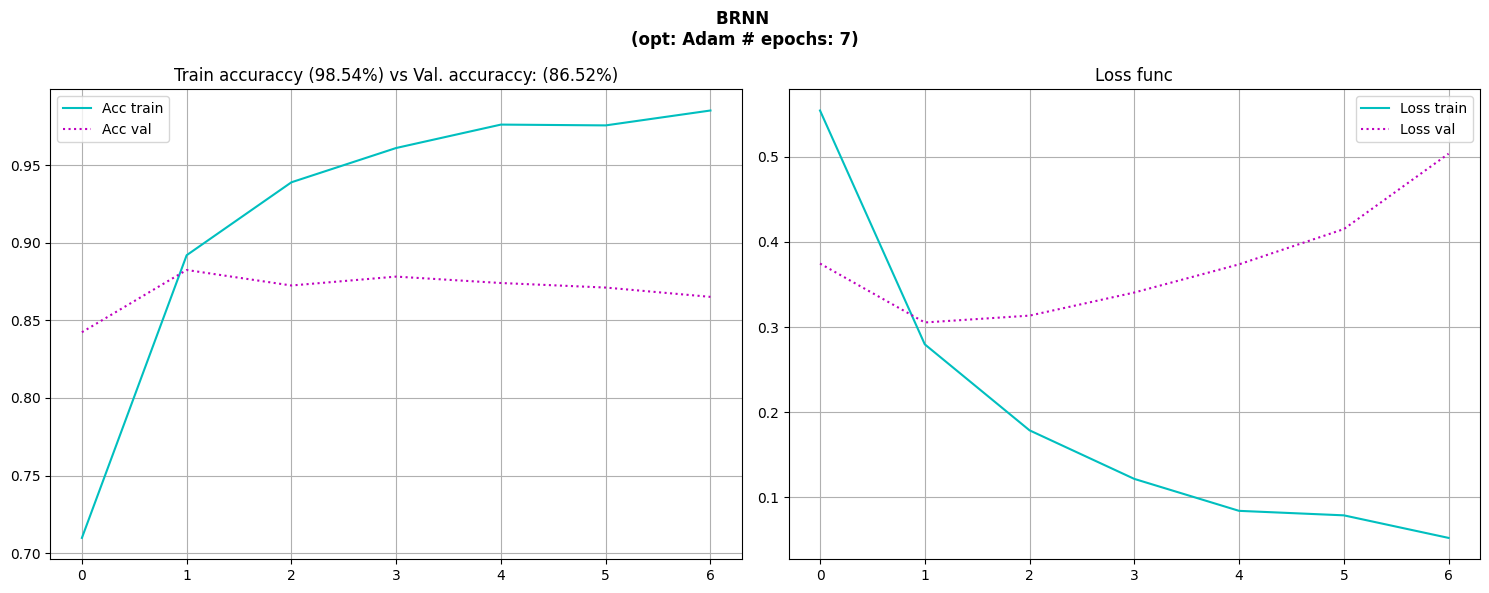

In [27]:
acc = history_BRNN.history['acc']
val_acc = history_BRNN.history['val_acc']
loss = history_BRNN.history['loss']
val_loss = history_BRNN.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'BRNN \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

In [28]:
predictions_BRNN = model_BRNN.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_BRNN = [1 if pred > 0.5 else 0 for pred in predictions_BRNN]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Pred: {binary_predictions_BRNN[i]}, Fact: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_BRNN.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 89s 112ms/step
Pred: 0, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 0
Pred: 1, Fact: 1
782/782 [==============================] - 90s 115ms/step - loss: 0.5535 - acc: 0.8518
Test Loss: 0.5534842610359192
Test Accuracy: 0.8518400192260742


# DRNN

In [29]:
model_DRNN = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model_DRNN.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

model_DRNN.add(Bidirectional(LSTM(32, return_sequences=True)))
model_DRNN.add(Bidirectional(LSTM(32)))

# Додавання Dense шару з одним вузлом та активацією sigmoid
model_DRNN.add(Dense(1, activation='sigmoid'))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

In [30]:
model_DRNN.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['acc'])

In [31]:
model_DRNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          480000    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 521537 (1.99 MB)
Trainable params: 521537 (1.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
history_DRNN = model_DRNN.fit(input_train, y_train, epochs=epochs, batch_size=128, validation_split=0.3)


Epoch 1/7
137/137 [==============================] - 355s 3s/step - loss: 0.4637 - acc: 0.7573 - val_loss: 0.3083 - val_acc: 0.8721
Epoch 2/7
137/137 [==============================] - 366s 3s/step - loss: 0.2100 - acc: 0.9222 - val_loss: 0.2776 - val_acc: 0.8896
Epoch 3/7
137/137 [==============================] - 332s 2s/step - loss: 0.1197 - acc: 0.9625 - val_loss: 0.3278 - val_acc: 0.8657
Epoch 4/7
137/137 [==============================] - 331s 2s/step - loss: 0.1109 - acc: 0.9633 - val_loss: 0.3529 - val_acc: 0.8765
Epoch 5/7
137/137 [==============================] - 321s 2s/step - loss: 0.0554 - acc: 0.9836 - val_loss: 0.3908 - val_acc: 0.8767
Epoch 6/7
137/137 [==============================] - 326s 2s/step - loss: 0.0481 - acc: 0.9858 - val_loss: 0.4683 - val_acc: 0.8727
Epoch 7/7
137/137 [==============================] - 325s 2s/step - loss: 0.0297 - acc: 0.9928 - val_loss: 0.5628 - val_acc: 0.8748


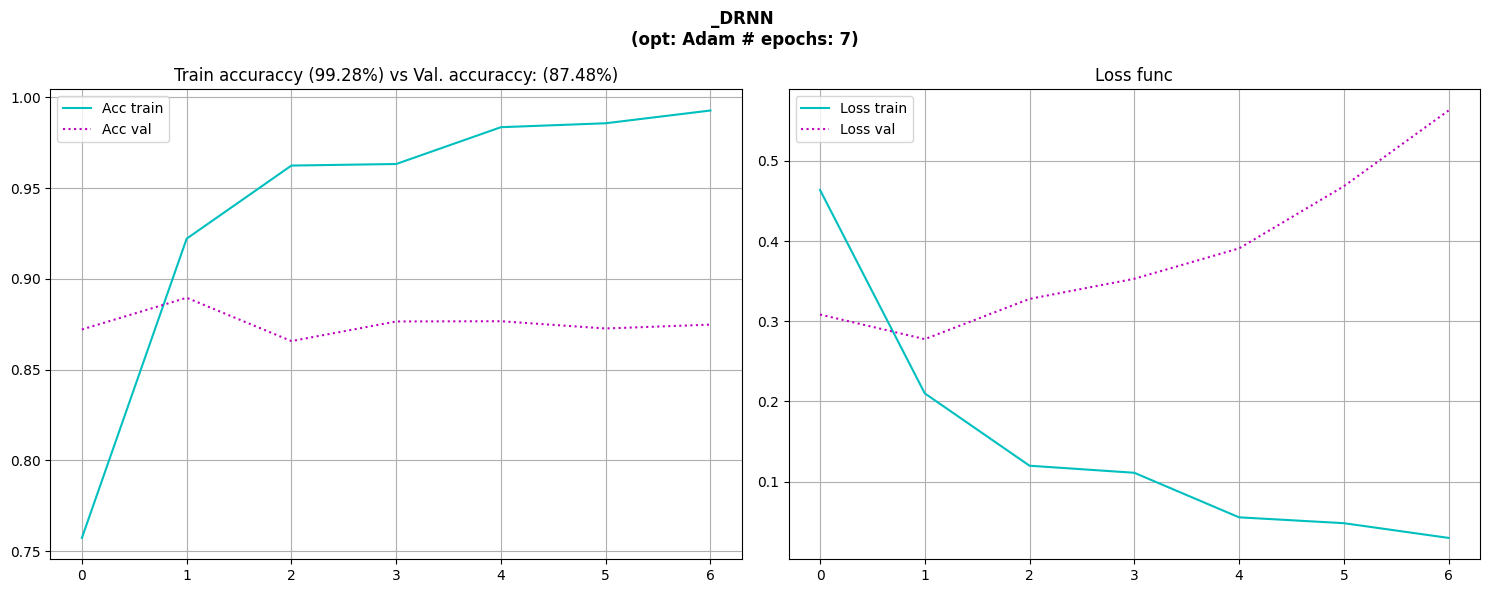

In [33]:
acc = history_DRNN.history['acc']
val_acc = history_DRNN.history['val_acc']
loss = history_DRNN.history['loss']
val_loss = history_DRNN.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'_DRNN \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

In [34]:
acc_DRNN = history_DRNN.history['acc']
val_acc_DRNN = history_DRNN.history['val_acc']

print(f"Acc_DRNN: {round(acc_DRNN[-1], 4)*100}% val_acc_DRNN: {round(val_acc_DRNN[-1], 4)*100}%")

Acc_DRNN: 99.28% val_acc_DRNN: 87.48%


In [35]:
predictions_DRNN = model_DRNN.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions_DRNN = [1 if pred > 0.5 else 0 for pred in predictions_DRNN]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Pred: {binary_predictions_DRNN[i]}, Fact: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model_DRNN.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 194s 246ms/step
Pred: 0, Fact: 0
Pred: 1, Fact: 1
Pred: 0, Fact: 1
Pred: 1, Fact: 0
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 1, Fact: 1
Pred: 0, Fact: 0
Pred: 1, Fact: 0
Pred: 1, Fact: 1
782/782 [==============================] - 217s 277ms/step - loss: 0.6387 - acc: 0.8556
Test Loss: 0.6387100219726562
Test Accuracy: 0.8556399941444397


# Out


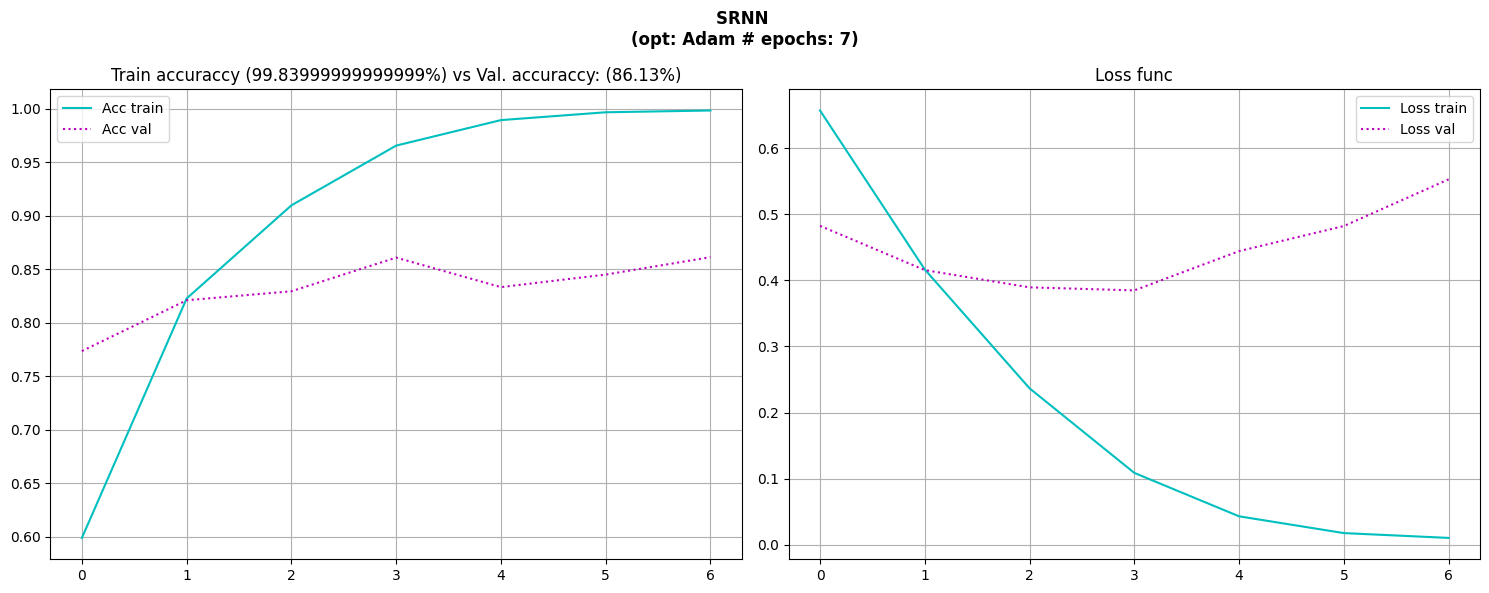

In [ ]:
# @title
acc = history_simple.history['acc']
val_acc = history_simple.history['val_acc']
loss = history_simple.history['loss']
val_loss = history_simple.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'SRNN \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

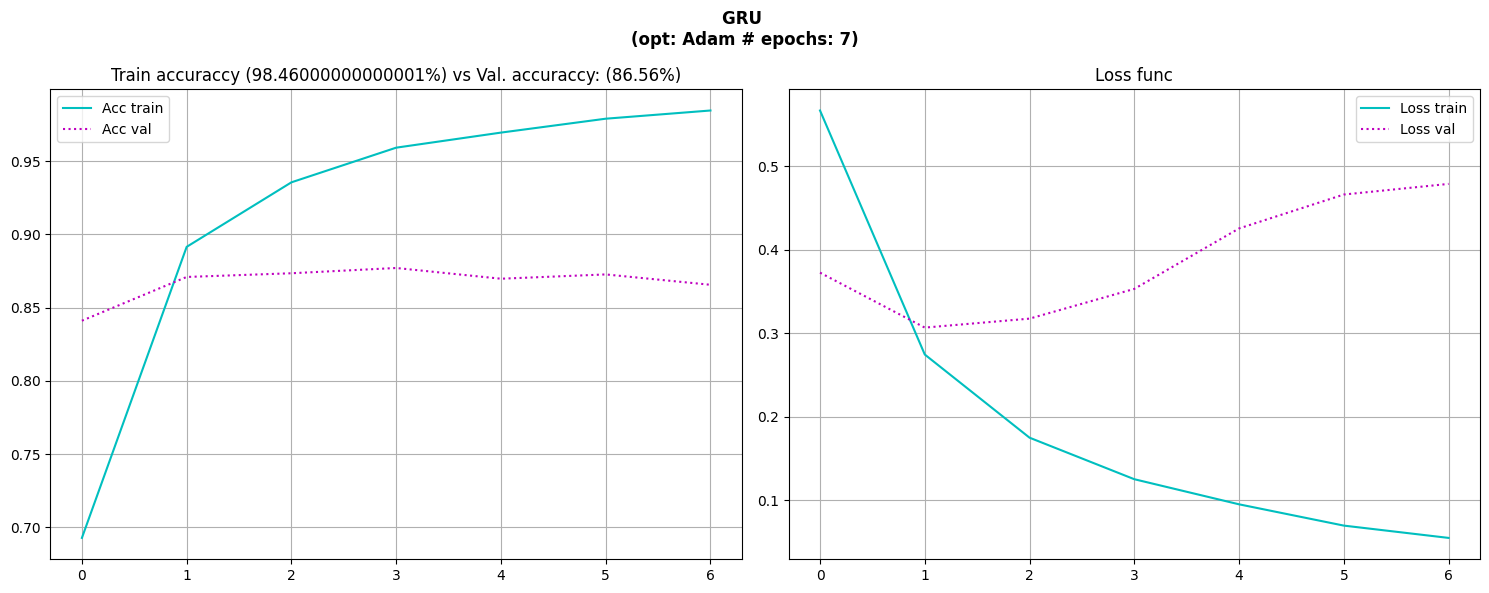

In [ ]:
# @title
acc = history_GRU.history['acc']
val_acc = history_GRU.history['val_acc']
loss = history_GRU.history['loss']
val_loss = history_GRU.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'GRU \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

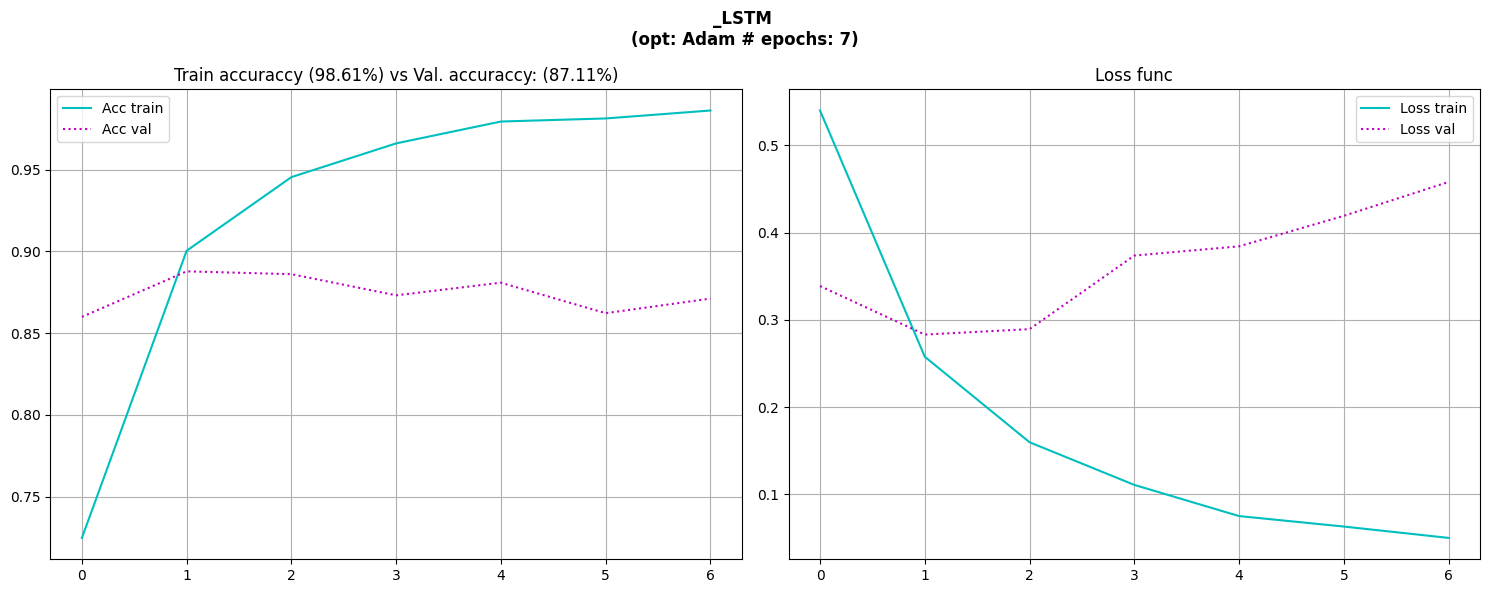

In [ ]:
# @title
acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'_LSTM \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

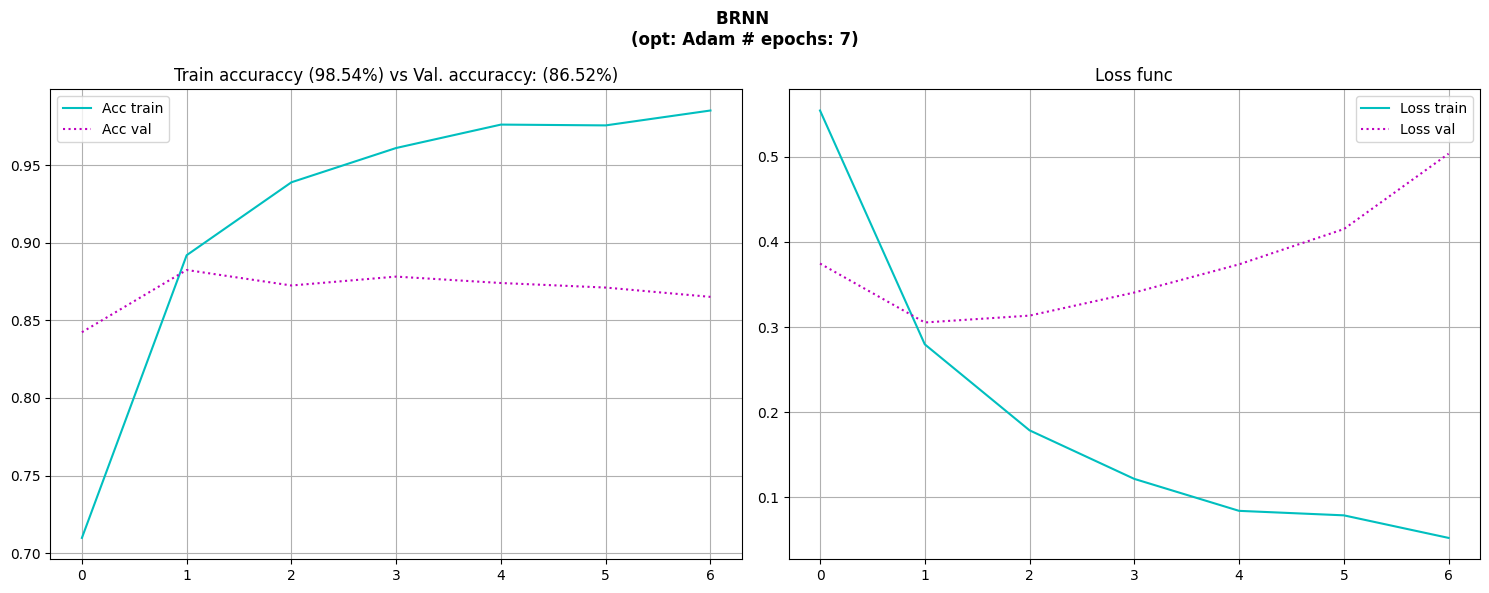

In [ ]:
# @title
acc = history_BRNN.history['acc']
val_acc = history_BRNN.history['val_acc']
loss = history_BRNN.history['loss']
val_loss = history_BRNN.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'BRNN \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

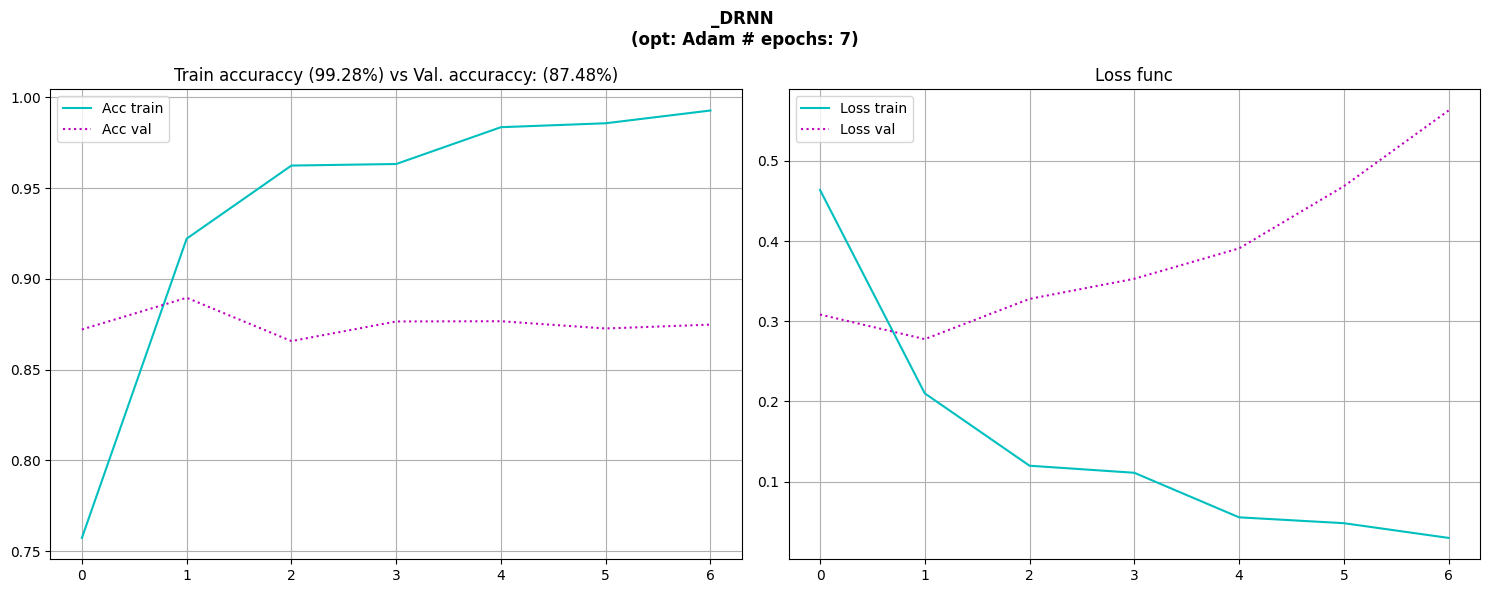

In [ ]:
# @title
acc = history_DRNN.history['acc']
val_acc = history_DRNN.history['val_acc']
loss = history_DRNN.history['loss']
val_loss = history_DRNN.history['val_loss']

# epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'_DRNN \n(opt: {optimizer} # epochs: {epochs})', weight='bold')
# ax1.plot(x, y)
# ax2.plot(x, -y)
ax1.plot( acc, 'c', label='Acc train')  # Графік точності на тренувальних данних
ax1.plot( val_acc, 'm:', label='Acc val')  # Графік точності на валідаційних данних
ax1.set_title(f'Train accuraccy ({round(acc[-1], 4)*100}%) vs Val. accuraccy: ({round(val_acc[-1], 4)*100}%)')
ax1.legend()  # Показати легенду
ax1.grid()
# plt.tight_layout()
# plt.figure()

ax2.plot( loss, 'c', label='Loss train')  # Графік втрат на тренувальних данних
ax2.plot( val_loss, 'm:', label='Loss val')  # Графік втрат на валідаційних данних
ax2.set_title('Loss func')  # Заголовок графіку
ax2.legend()  # Показати легенду
ax2.grid()
plt.tight_layout()
plt.show()  # Відобразити графіки

**Conclusion**

Розглянуті рекурентні мережі показали приблизно однакові показники на валідаційних данних. Можемо відзначити схильність до перенавчання в simple RNN.

Оптимальними, з моєї точки зору, є архітектури з GRU та LSTM - стабільний результат та час навчання.

DRNN через складність архітектури навчається приблизно в 6 та 8 разів довше порівняно з GRU/LSTM та SRNN відповідно маючі майже однакові вихідні показники.